# Bike Sharing Demand Analysis using ML Multi Linear Regression
  Submitted by ***Vishnu Vardhan Gudla***

# Objective
Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

So, it has decided to come up with a mindful business plan to be able to accelerate its revenue by understanding the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

# Business Goal:

You are required to model the demand for shared bikes, which will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Bike Sharing Demand Analysis Outline:
1. Reading, understanding and visualizing the data (EDA)

2. Preparing the data for model training (train-test split, rescaling)

3. Training the model (Model building, Feature Selection (RFE+Manual))

4. Residual analysis

5. Prediction and evaluation of the test set

# 1. Importing all the Neccessary libraries

In [318]:
import numpy as np # for numerical computation
import pandas as pd # for import and manipulating the data sets

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore wanings
import warnings
warnings.filterwarnings("ignore")

# ML related libraries and function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows',150)

# 2. Importing data from the CSV file and understanding the data

In [319]:
boom=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')

In [320]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [321]:
# shape the dataframe
boom.shape

(730, 16)

In [322]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [323]:
# getting to understand statistical information of numerical variables
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3. Data Cleaning

## 3.1 Check for Null values in the data

In [324]:
# total number of null values in each column
boom.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 3.2 Identifying and removing the uneccessary columns in the dataset

In [325]:
drop_c=['instant','dteday','atemp','casual','registered']
boom.drop(drop_c,axis=1,inplace=True)

In [326]:
boom.shape

(730, 11)

## 3.3 Mapping appropriate String values to Categorical Variables

In [327]:
Cat_c=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [328]:
for i in range(len(Cat_c)):
  print("unique values in",Cat_c[i], "are: ",boom[Cat_c[i]].unique())

unique values in season are:  [1 2 3 4]
unique values in yr are:  [0 1]
unique values in mnth are:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
unique values in holiday are:  [0 1]
unique values in weekday are:  [6 0 1 2 3 4 5]
unique values in workingday are:  [0 1]
unique values in weathersit are:  [2 1 3]


In [329]:
# Assigning appropriate labels to the categorical Variables
boom['season']=boom.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom['mnth']=boom.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom['weathersit']=boom.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow + Rain',4:'Heavy Rain + Fog'})
boom['weekday']=boom.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


# 4. Exploratory Data Analysis

# 4.1 Visualizing the target variable

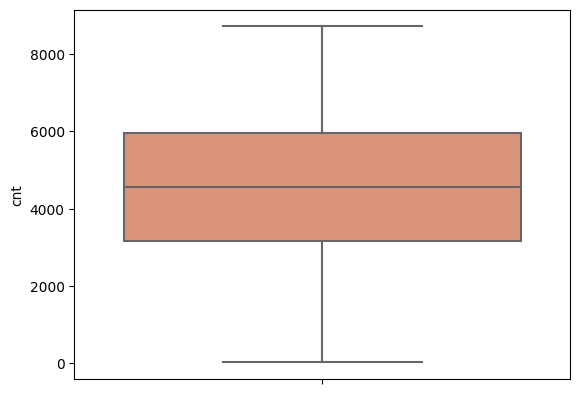

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


In [330]:
sns.boxplot(boom, y='cnt',palette=sns.color_palette("flare"))
plt.show()
print(boom.cnt.describe())

* The mean and median of count variable is approximately same.
* The demand for sharing bikes lies in the range of 3000 to 6000

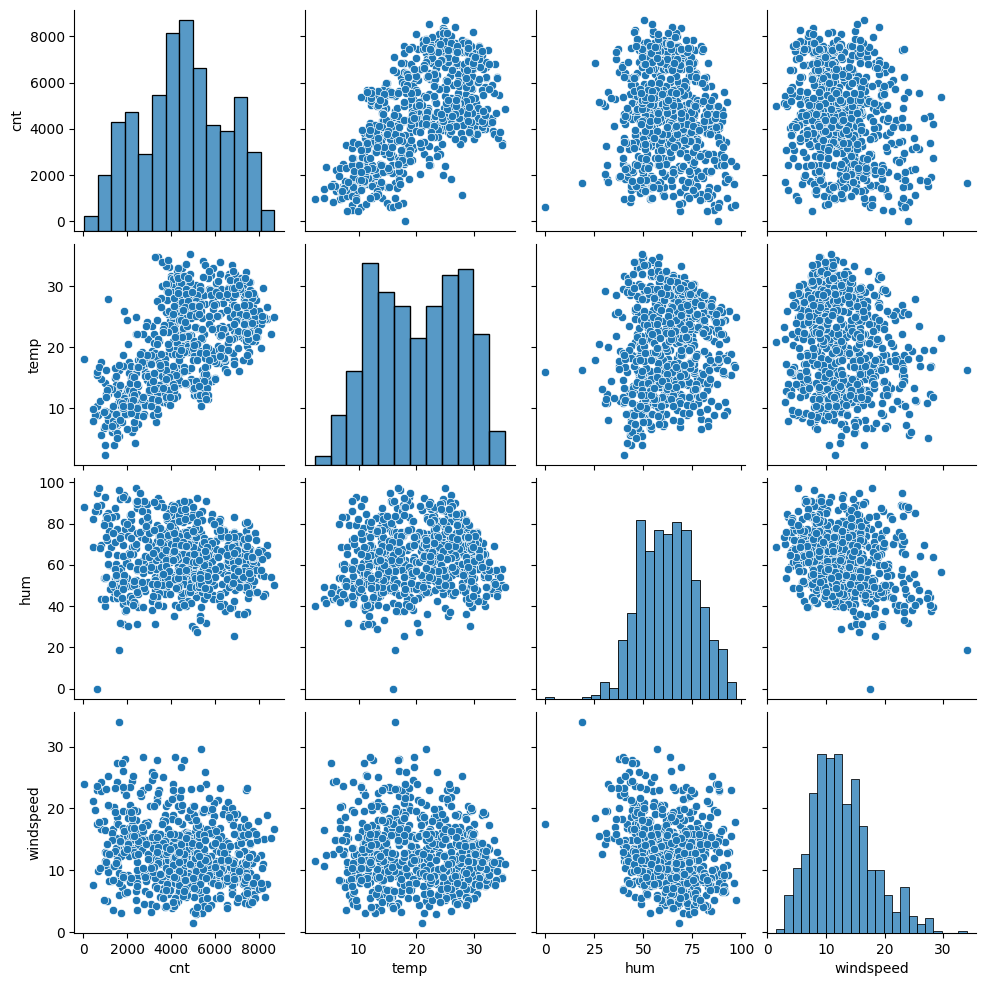

In [331]:
# Visualizing numerical variables
num_c=['cnt','temp','hum','windspeed']
sns.pairplot(boom,vars=num_c)
plt.show()

In [332]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


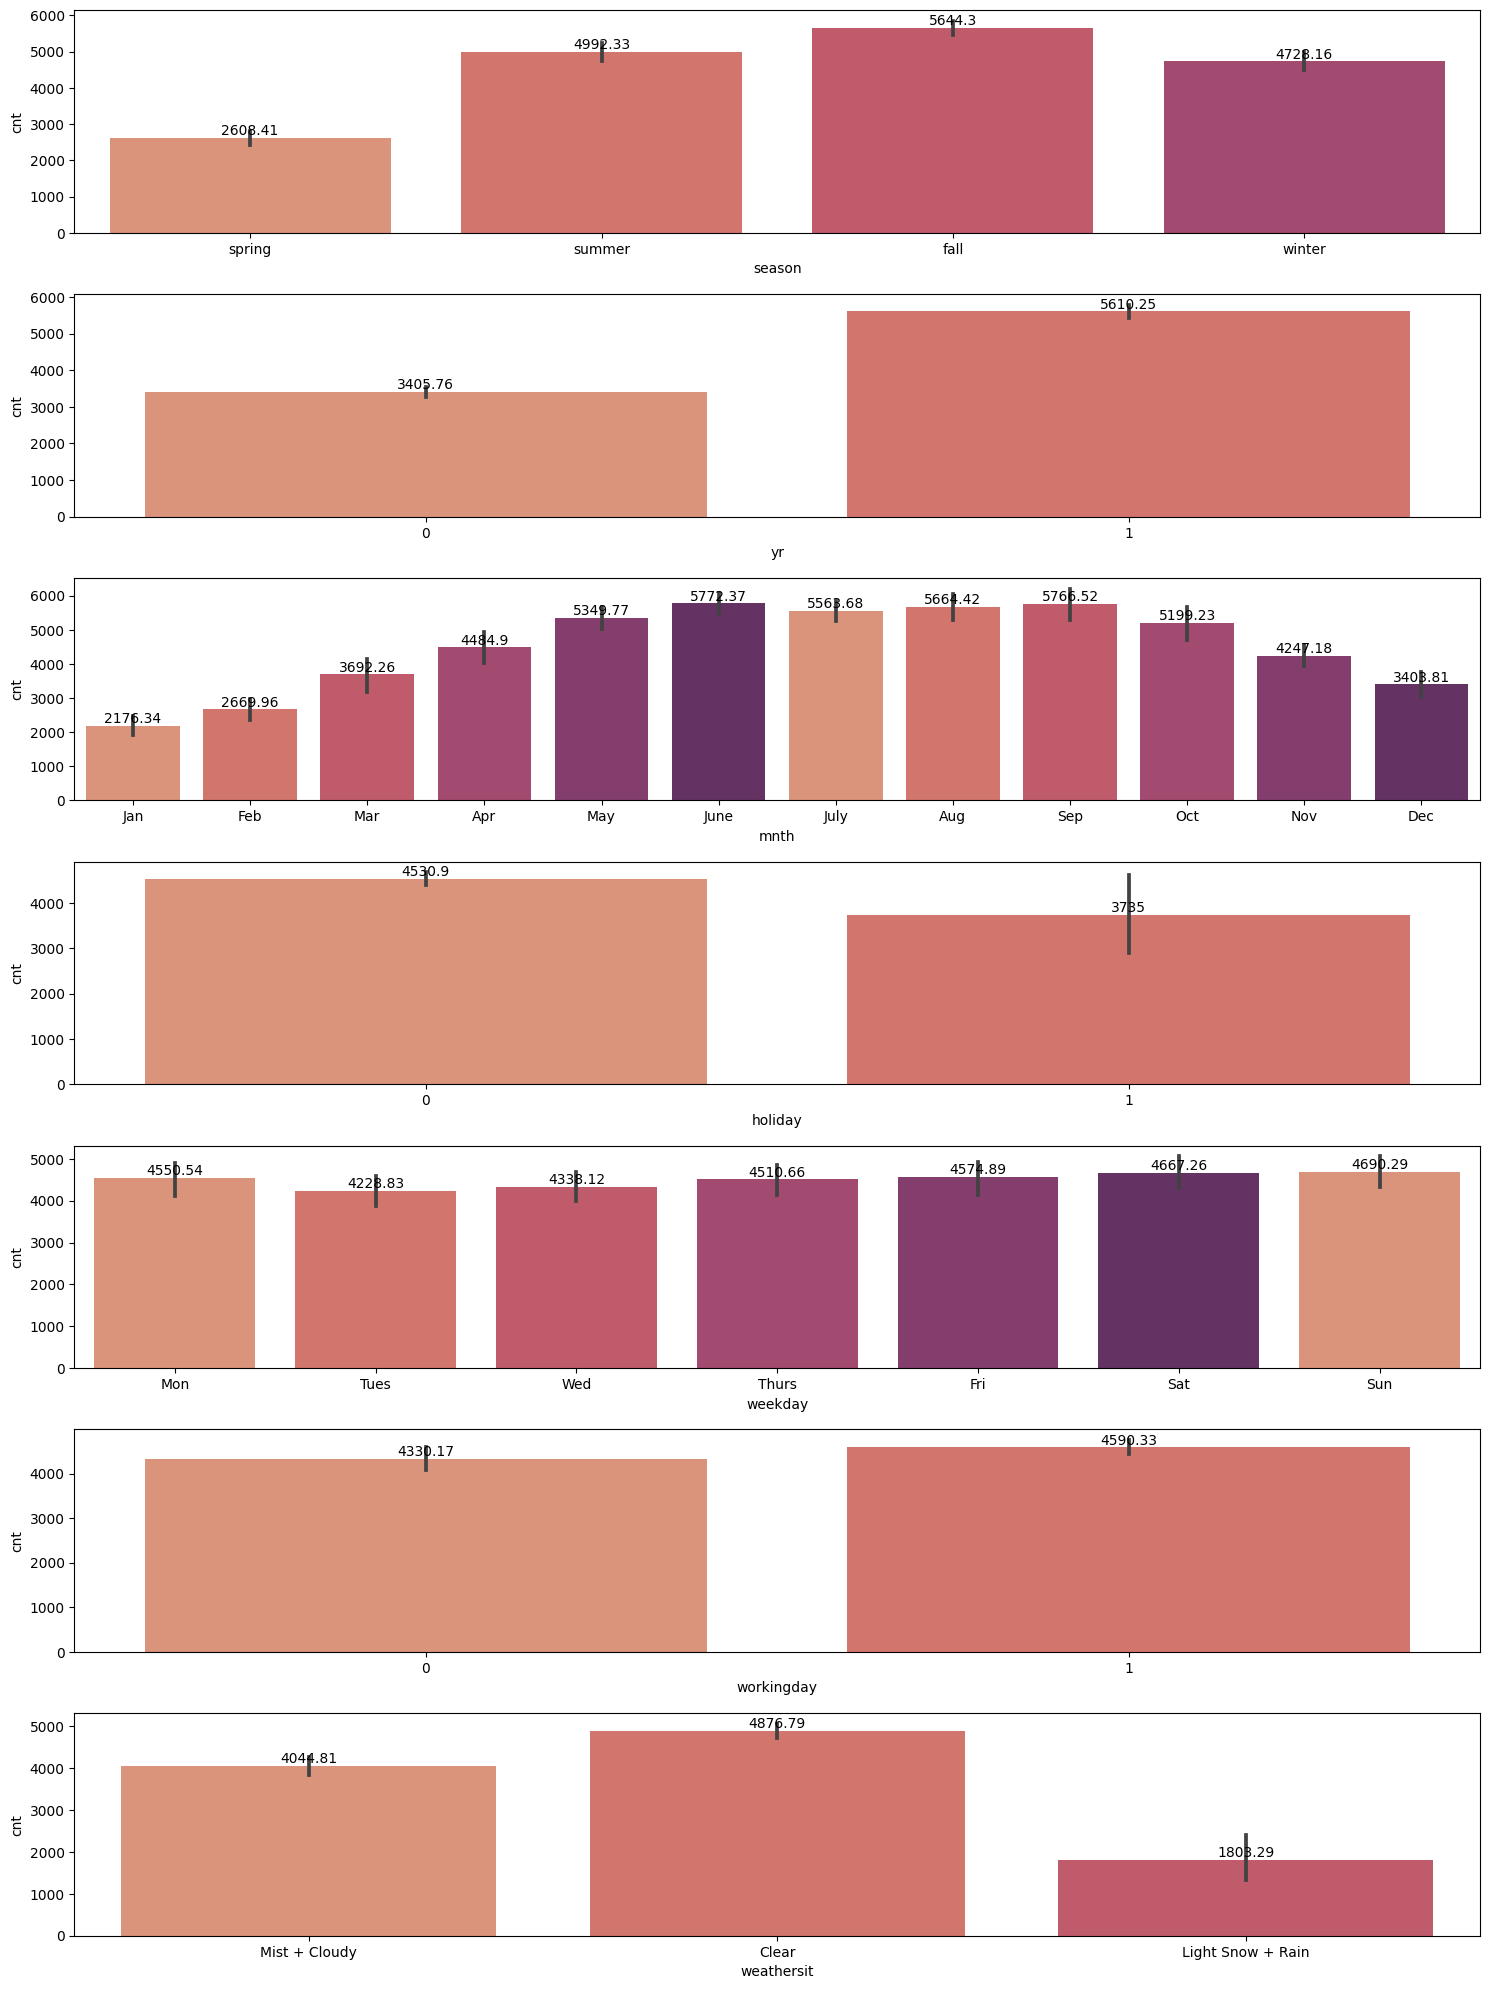

In [333]:
# Visualizing Categorical Variables w.r.t target variable 'cnt'
fig, ax = plt.subplots(int(len(Cat_c)),1, figsize=(15, 20))
for i in range(len(Cat_c)):
    plt.subplot(int(len(Cat_c)),1,i+1)
    f=sns.barplot(data=boom,y='cnt',x=Cat_c[i],palette=sns.color_palette("flare"))
    for val in f.containers:
      f.bar_label(val)
plt.tight_layout()
plt.show()

**Observations:**
* Demand for sharing bikes increased in 2019 compared to 2018
* Demand for sharing bikes is high in fall season and low in spring
* Demand for sharing bikes is low during holidays
* Demand for sharing bikes is low in light snow/ rain weather


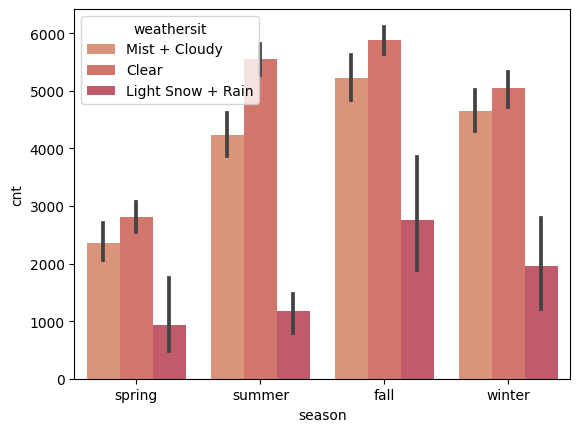

In [334]:
sns.barplot(boom,y='cnt',x='season',hue='weathersit', palette=sns.color_palette("flare"))
plt.show()

**Observations:**

* Demand for sharing bikes is high during fall season and when the weather is clear
* Demand for sharing bikes is low during spring and when there is light snow/rain weather.

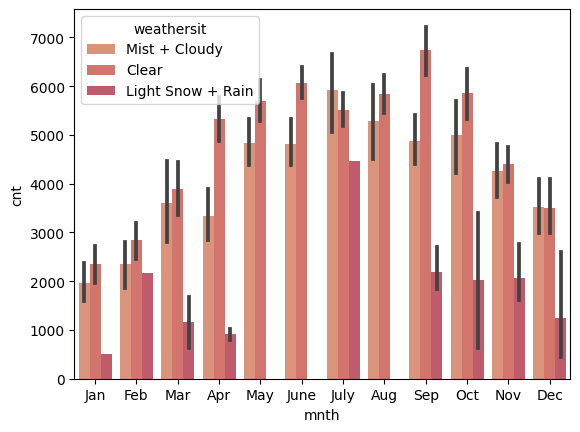

In [335]:
sns.barplot(boom,y='cnt',x='mnth',hue='weathersit', palette=sns.color_palette("flare"))
plt.show()

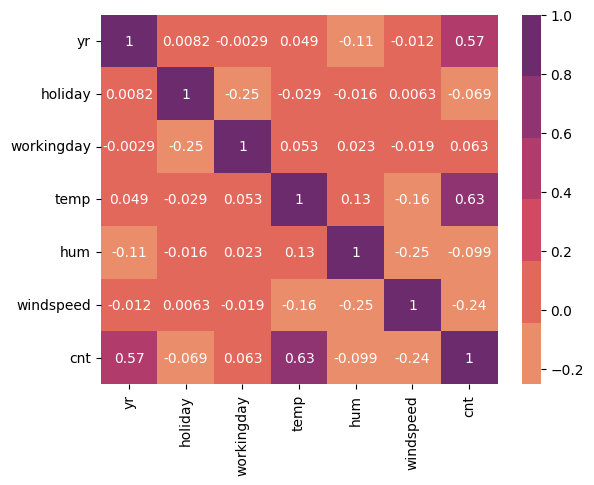

In [336]:
 #corelations between different variables using a heatmap

#plt.figure(figsize=(10, 12))
sns.heatmap(boom.corr(),annot=True,cmap=sns.color_palette("flare"))
plt.show()
#cmap='viridis'

**Observations: **

* The target variable 'cnt' has high correlation with 'temp' followed by 'yr' variable


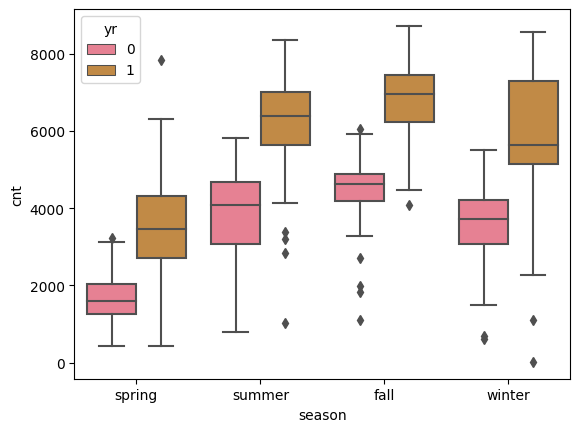

In [337]:
sns.boxplot(data=boom,y='cnt',x='season', hue='yr',palette=sns.color_palette("husl", 9))
plt.show()

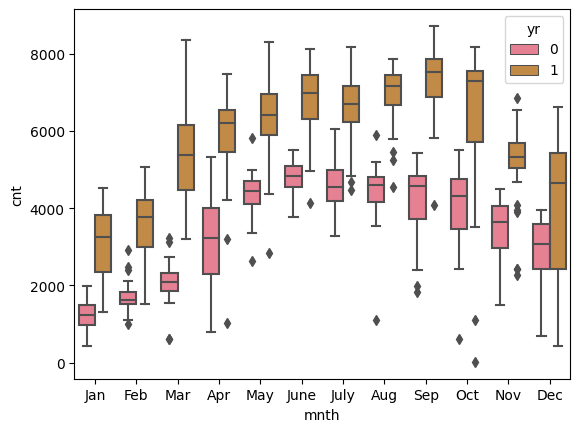

In [338]:
sns.boxplot(data=boom,y='cnt',x='mnth', hue='yr',palette=sns.color_palette("husl", 9))
plt.show()

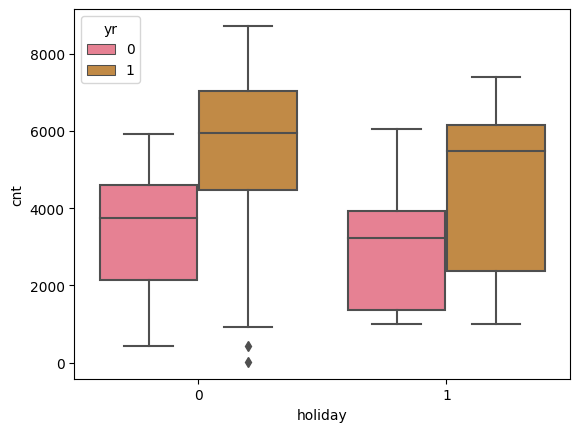

In [339]:
sns.boxplot(data=boom,y='cnt',x='holiday', hue='yr',palette=sns.color_palette("husl", 9))
plt.show()

# 5. Data Preparation for Model Building

# 5.1 Creating Dummy variables

In [340]:
# creating dummy variable columns
season_dum = pd.get_dummies(boom['season'],drop_first=True)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [341]:
mnth_dum = pd.get_dummies(boom['mnth'],drop_first=True)
mnth_dum.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [342]:
weekday_dum = pd.get_dummies(boom['weekday'],drop_first=True)
weekday_dum.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [343]:
weathersit_dum = pd.get_dummies(boom['weathersit'],drop_first=True)
weathersit_dum.head()

,Light Snow + Rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [344]:
# adding Dummy variable columns to the dataset and Dropping original columns
boom = pd.concat([boom,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
boom = boom.drop(columns=['season','mnth','weekday','weathersit'])
boom.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow + Rain,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
boom.shape

(730, 29)

In [346]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   spring             730 non-null    uint8  
 8   summer             730 non-null    uint8  
 9   winter             730 non-null    uint8  
 10  Aug                730 non-null    uint8  
 11  Dec                730 non-null    uint8  
 12  Feb                730 non-null    uint8  
 13  Jan                730 non-null    uint8  
 14  July               730 non-null    uint8  
 15  June               730 non-null    uint8  
 16  Mar                730 non

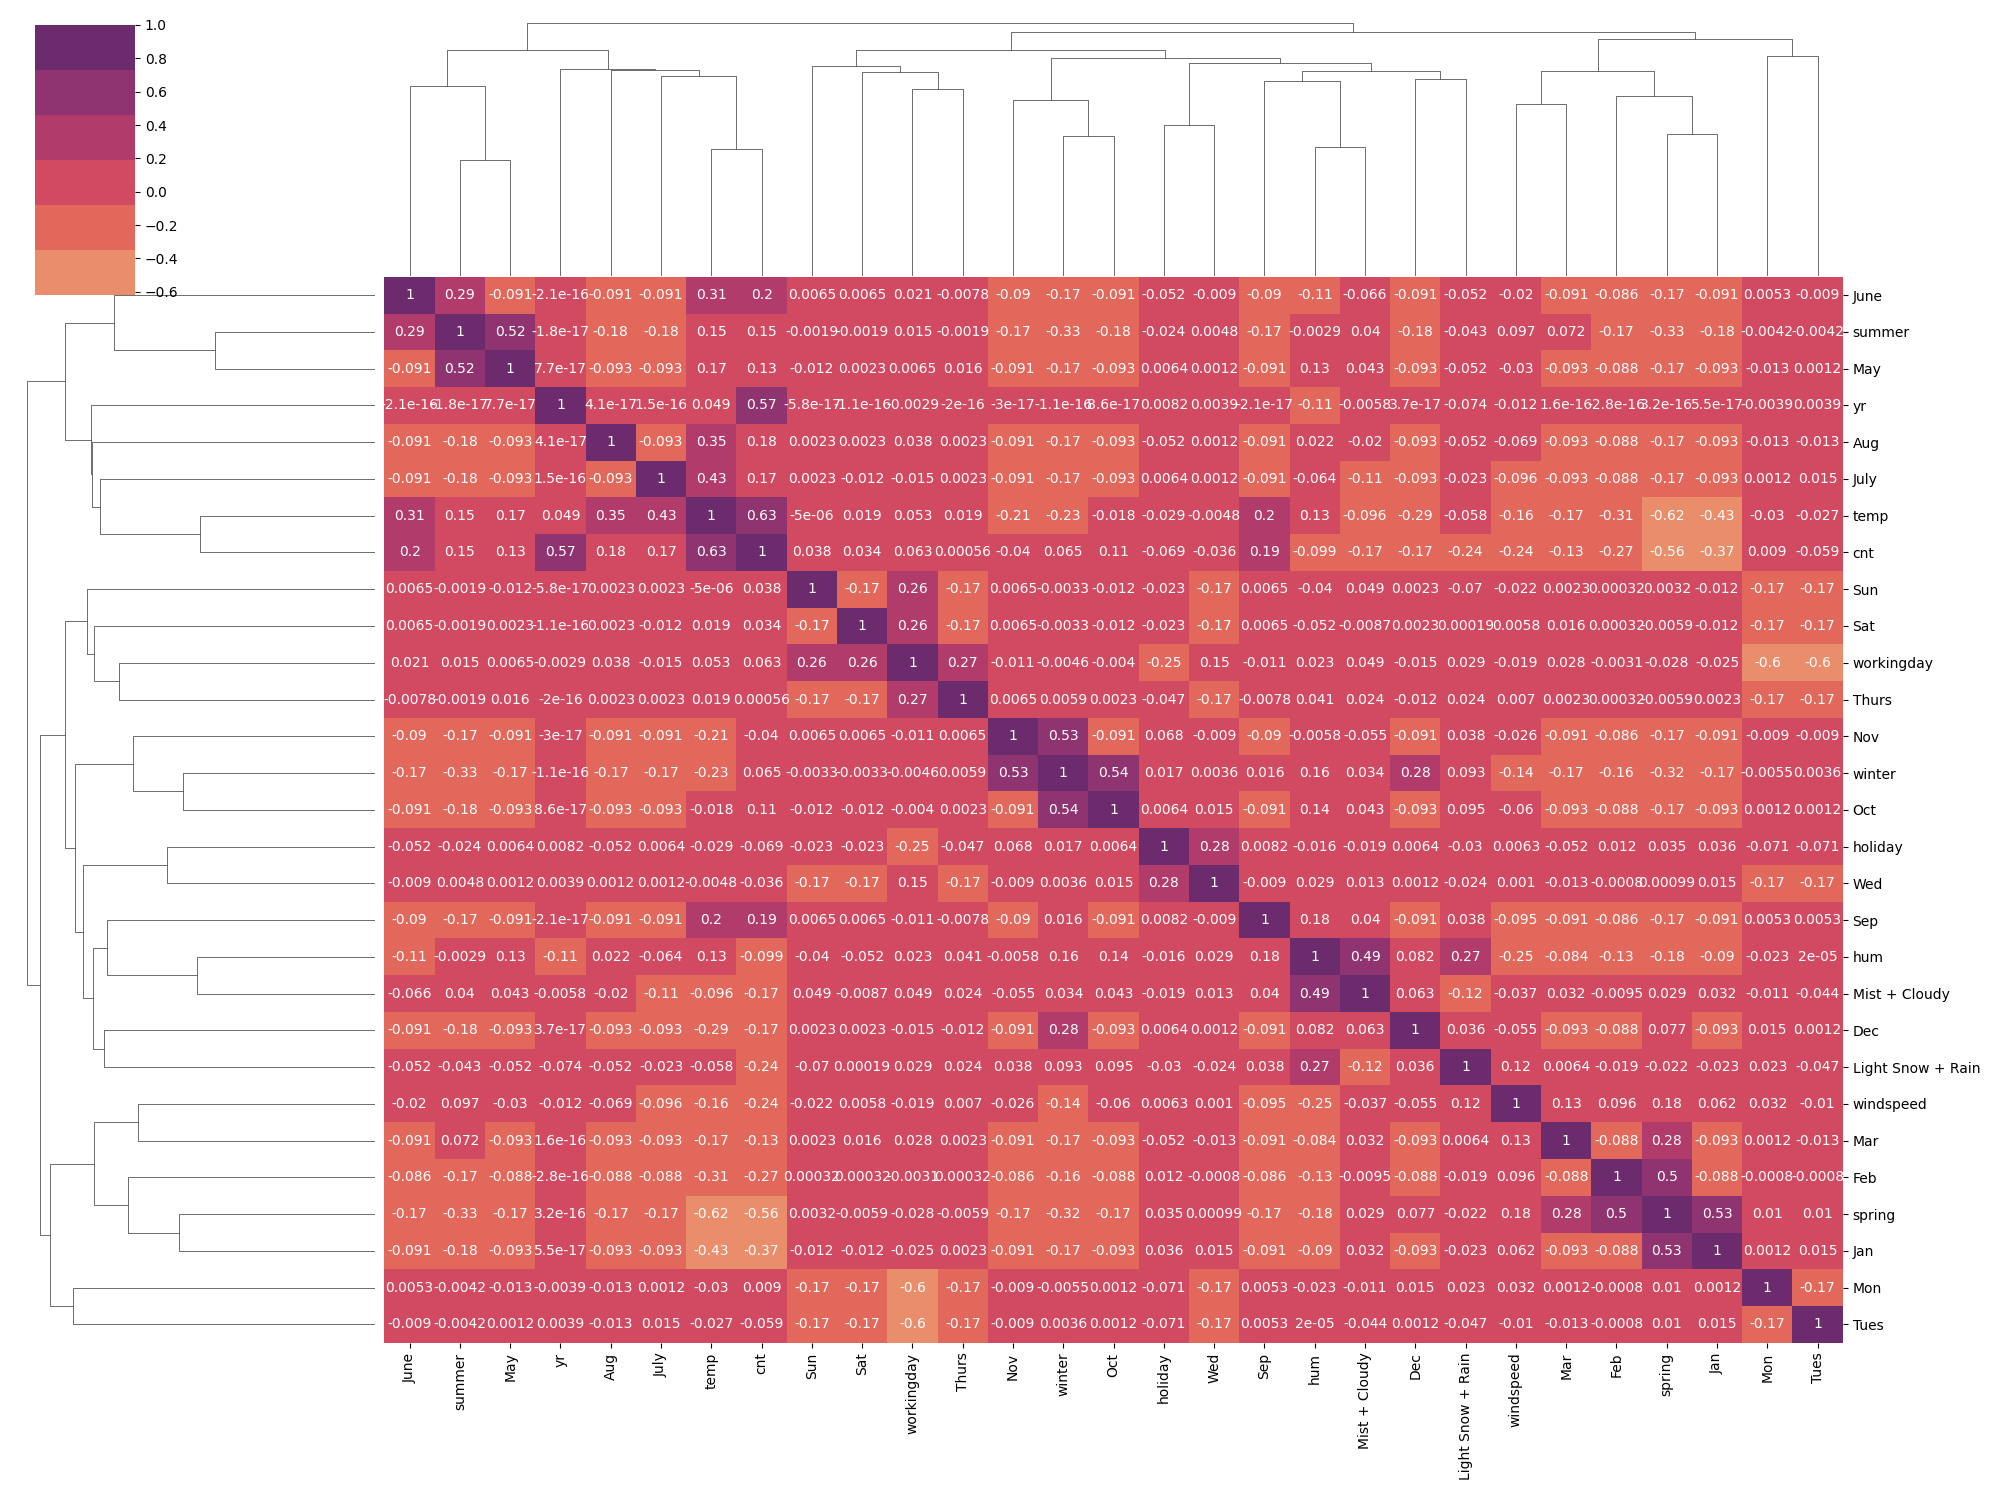

In [347]:
sns.clustermap(boom.corr(), annot=True, figsize=(20, 15),cmap=sns.color_palette("flare"))
plt.show()

# 5.2 Splitting the Data Into Train and Test Datasets

- Use sklearn train_test_split function

In [348]:
boom_train,boom_test = train_test_split(boom,train_size=0.7,test_size=0.3,random_state=100)

In [349]:
print(boom_train.shape)
print(boom_test.shape)

(510, 29)
(219, 29)


## 5.3 Rescaling the numerical variables using min-max scaling

scaling=(x-xmin)/(x max-x min)

In [350]:
num_scaler = MinMaxScaler()
num_cols = ['temp','hum','windspeed','cnt']

boom_train[num_cols] = num_scaler.fit_transform(boom_train[num_cols])

In [351]:
boom_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow + Rain,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [352]:
boom_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow + Rain,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


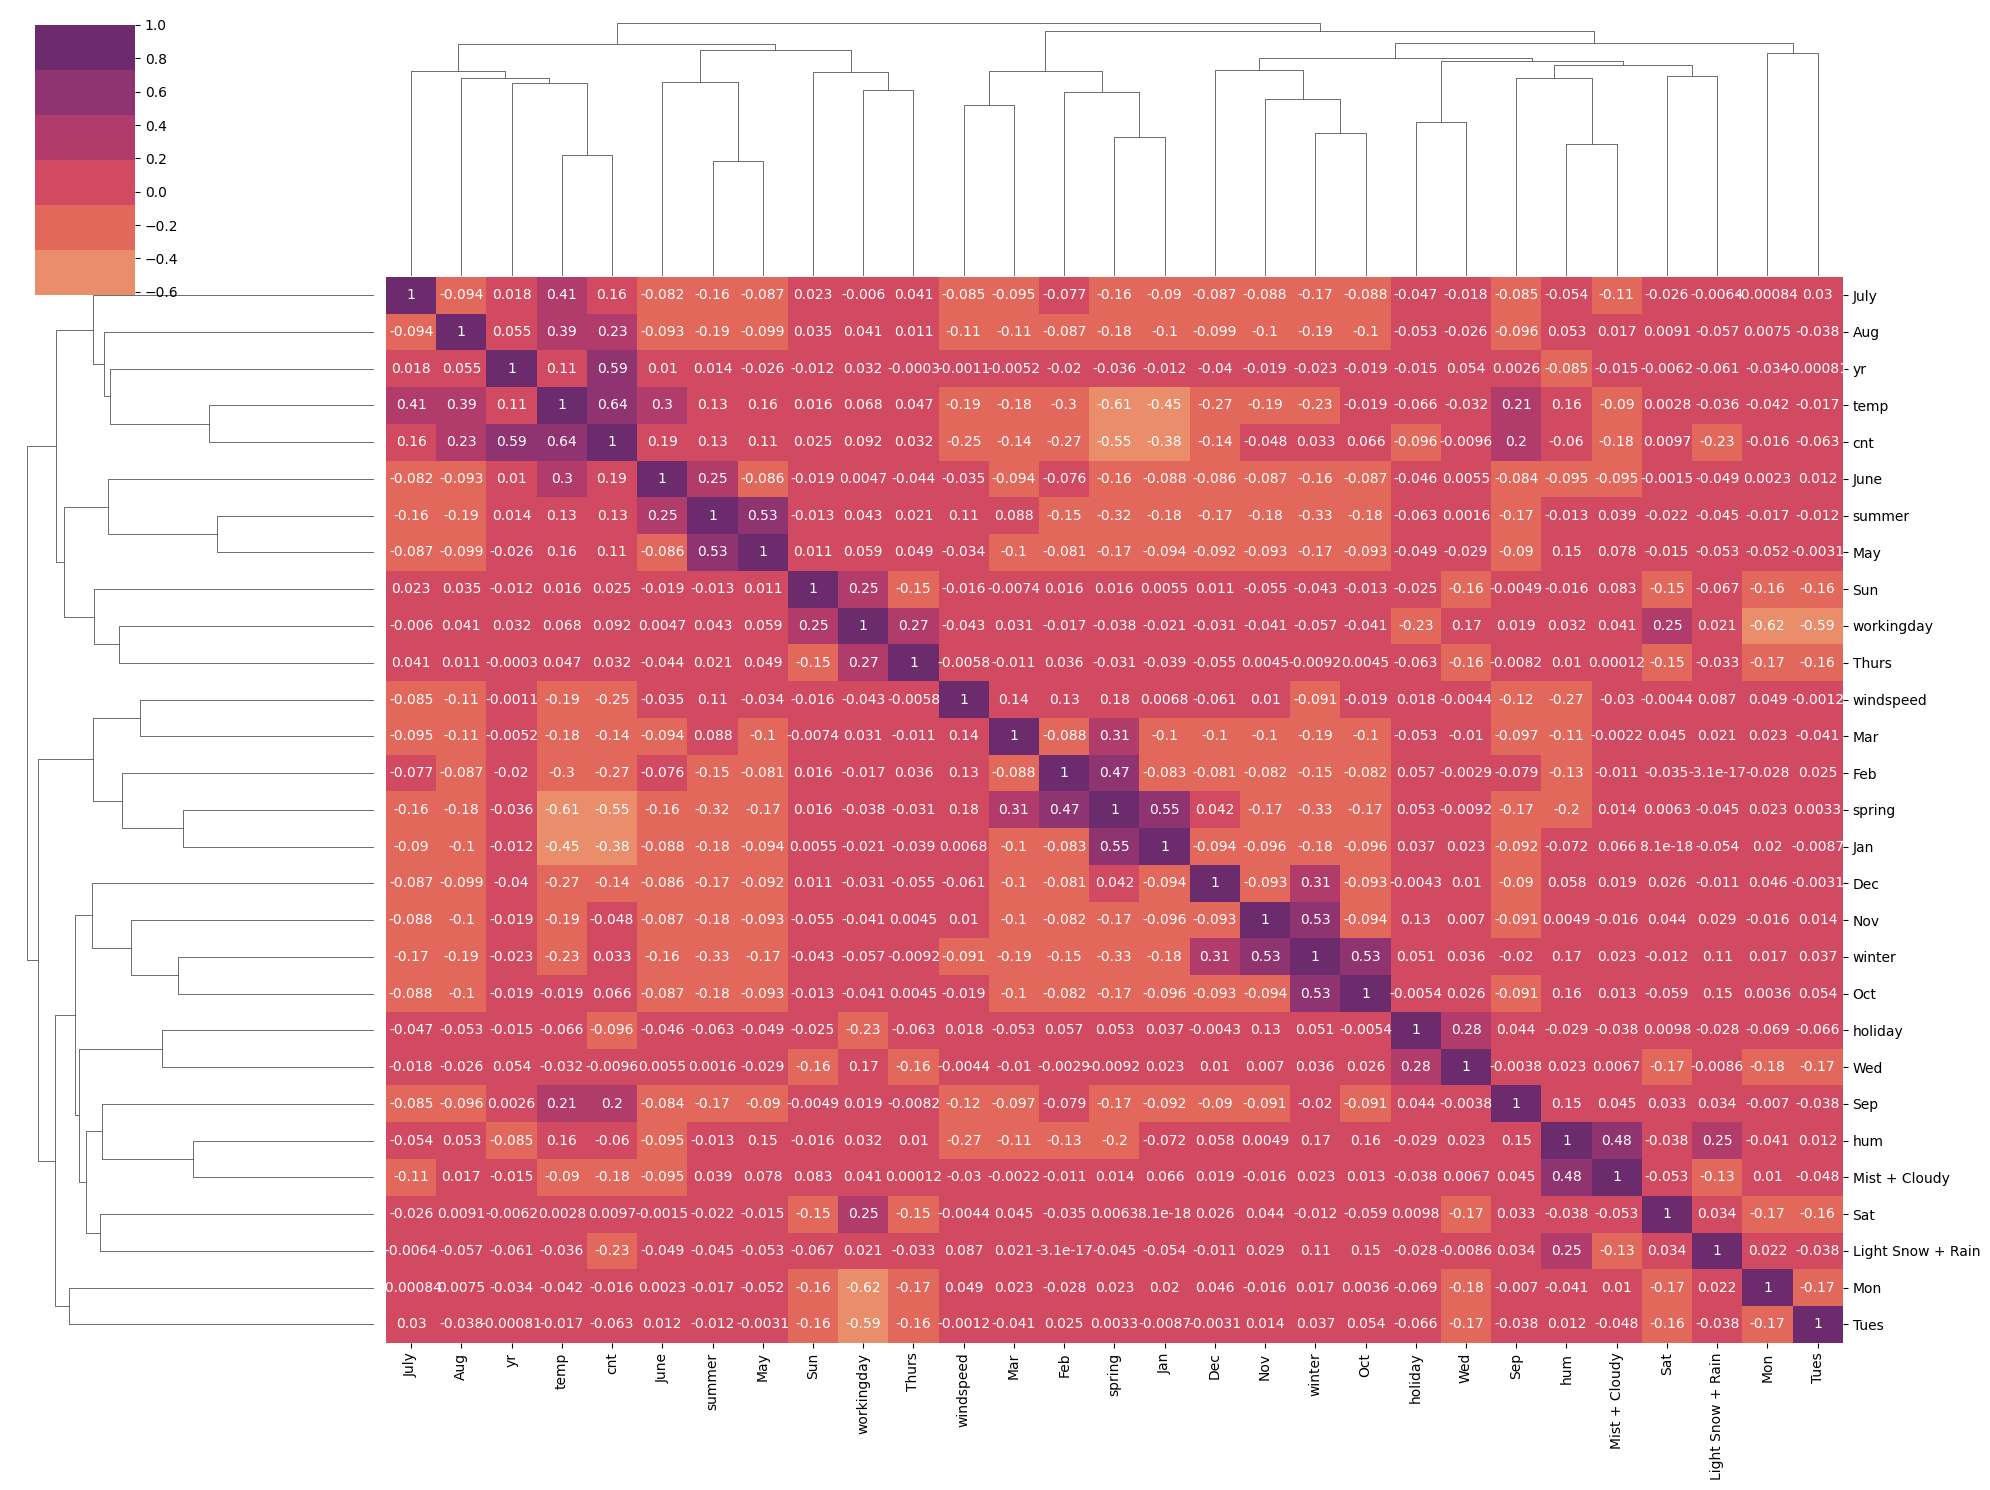

In [353]:
sns.clustermap(boom_train.corr(),figsize=(20, 15), annot = True,cmap=sns.color_palette("flare"))
plt.show()

### The target variable 'cnt' has high correlation with 'temp' followed by 'yr'  

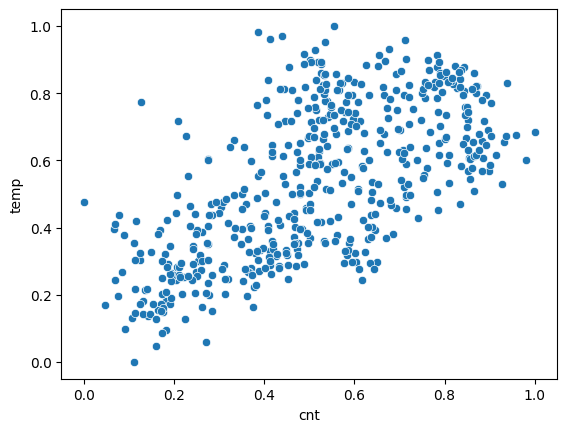

In [354]:
sns.scatterplot(boom_train,y='temp',x='cnt')
plt.show()

## 5.4 Separating the target varaible 'cnt' to create X and y datasets for model building

In [355]:
y_train = boom_train.pop('cnt')
X_train = boom_train

# 6. Building the Multilinear Regression Model

Automated Approach (RFE) + Manual Approch (p-value, VIF, correlinearity)

6.1 Feature selection using Recursive Feature Elimination (RFE)


In [356]:
# Running RFE with the output number of the variable equal to 15
MLRm = LinearRegression()
MLRm.fit(X_train, y_train)

rfe = RFE(estimator=MLRm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [357]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 10),
 ('Thurs', False, 9),
 ('Tues', True, 1),
 ('Wed', False, 7),
 ('Light Snow + Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [358]:
col_s = X_train.columns[rfe.support_]
col_s

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Jan', 'July', 'Sep', 'Mon', 'Tues', 'Light Snow + Rain',
       'Mist + Cloudy'],
      dtype='object')

In [359]:
cols_n=X_train.columns[~rfe.support_]
cols_n

Index(['summer', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

# 6.2 Manual Approach-Building model using statsmodel for detailed statistics and further feature elimination

In [360]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_s]

In [361]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [362]:
MLRm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [363]:
#Let's see the summary of our linear model
print(MLRm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.03e-190
Time:                        16:33:27   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2503      0.02

Holiday has the highest p-value and hence can be considered insignificant and dropped

In [364]:
X_train_n = X_train_rfe.drop(["holiday"], axis = 1)
X_train_n.head()

,const,yr,workingday,temp,hum,windspeed,spring,winter,Jan,July,Sep,Mon,Tues,Light Snow + Rain,Mist + Cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,0,1


### 6.2.1 Rebuilding the model with new X_train data

In [365]:
MLRm2 = sm.OLS(y_train,X_train_n).fit()

In [366]:
print(MLRm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.03e-190
Time:                        16:33:27   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2443      0.04

Tues has the next highest p-value and can be dropped

In [367]:
X_train_n1 = X_train_n.drop(["Tues"], axis = 1)
X_train_n1.head()

,const,yr,workingday,temp,hum,windspeed,spring,winter,Jan,July,Sep,Mon,Light Snow + Rain,Mist + Cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,1


In [368]:
MLRm3 = sm.OLS(y_train,X_train_n1).fit()

In [369]:
print(MLRm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.93e-190
Time:                        16:33:27   Log-Likelihood:                 511.72
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     496   BIC:                            -936.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2946      0.03

### 6.2.2 Calculating Variance Inflation Factor (VIF)

In [370]:
X_train_n2 = X_train_n1.drop(['const'], axis=1)

In [371]:
vif = pd.DataFrame()
X = X_train_n2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.98
2,temp,16.63
1,workingday,4.65
4,windspeed,4.14
5,spring,2.94
12,Mist + Cloudy,2.23
6,winter,2.12
0,yr,2.07
10,Mon,1.82
7,Jan,1.67


As humidity column has high VIF value (>10) and can be dropped

In [372]:
X_train_n3=X_train_n2.drop(['hum'], axis=1)

In [373]:
# rebuilding the model again
X_train_n3 = sm.add_constant(X_train_n3)
MLRm4 = sm.OLS(y_train,X_train_n3).fit()

In [374]:
print(MLRm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.76e-188
Time:                        16:33:27   Log-Likelihood:                 504.69
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     497   BIC:                            -928.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2180      0.02

In [375]:
X_train_n3.shape

(510, 13)

In [376]:
#Drop the constant
X_train_n3=X_train_n3.drop(['const'],axis=1)

# recalculating VIF
vif = pd.DataFrame()
X = X_train_n3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.62
1,workingday,4.50
3,windspeed,4.12
4,spring,2.36
0,yr,2.07
9,Mon,1.80
6,Jan,1.61
11,Mist + Cloudy,1.55
5,winter,1.45
7,July,1.37


Removing Jan variable as it has high p value

In [377]:
X_train_n4=X_train_n3.drop(['Jan'], axis=1)

In [378]:
# rebuilding the model again
X_train_n4 = sm.add_constant(X_train_n4)
MLRm5 = sm.OLS(y_train,X_train_n4).fit()

In [379]:
print(MLRm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.53e-188
Time:                        16:33:27   Log-Likelihood:                 501.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2038      0.02

In [380]:
#Drop the constant
X_train_n4=X_train_n4.drop(['const'],axis=1)

# recalculating VIF
vif = pd.DataFrame()
X = X_train_n4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.54
1,workingday,4.47
3,windspeed,4.11
0,yr,2.06
4,spring,1.81
8,Mon,1.79
10,Mist + Cloudy,1.54
5,winter,1.45
6,July,1.36
7,Sep,1.20


windspeed column has high VIF and negative correlation with target variable and hence can be dropped

In [381]:
X_train_n5=X_train_n4.drop(['windspeed'], axis=1)

In [382]:
# rebuilding the model again
X_train_n5 = sm.add_constant(X_train_n5)
MLRm6 = sm.OLS(y_train,X_train_n5).fit()

In [383]:
print(MLRm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.84e-183
Time:                        16:33:27   Log-Likelihood:                 485.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     499   BIC:                            -902.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1446      0.02

In [384]:
#Drop the constant
X_train_n5=X_train_n5.drop(['const'],axis=1)

# recalculating VIF
vif = pd.DataFrame()
X = X_train_n5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.47
1,workingday,4.37
0,yr,2.05
7,Mon,1.75
9,Mist + Cloudy,1.54
3,spring,1.50
4,winter,1.40
5,July,1.35
6,Sep,1.18
8,Light Snow + Rain,1.07


**Inferences:**

*   <mark>Number of features/variables are reduced to 10 using RFE + Manual approach
*   <mark>All the features has p-values less than 0.05
*   <mark>All the features has acceptable VIF values
*   <mark>R-squared value is 0.827, which indicates that ~82% of the variance in the target variable is explained by these 10 features/variables




# 7. Residual Analysis
  Checking whether the residuals/error terms are normally distributed

In [385]:
# Make the prediction on test data
X_train_n5 = sm.add_constant(X_train_n5)
y_train_pred = MLRm6.predict(X_train_n5)

Text(0.5, 0, 'Errors')

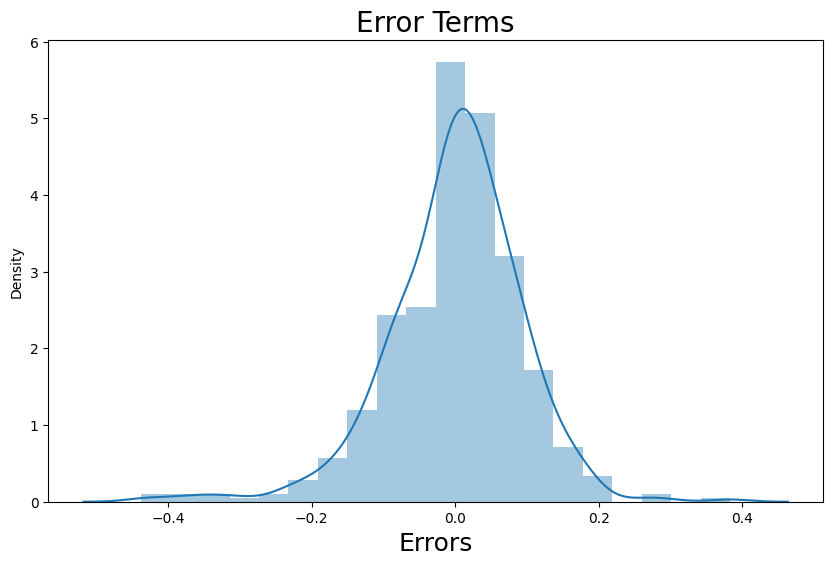

In [386]:
# Create histogram of the residual terms
plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

**Onservations:**

Error terms are normally distributed and hence ML assumptions are satisfied

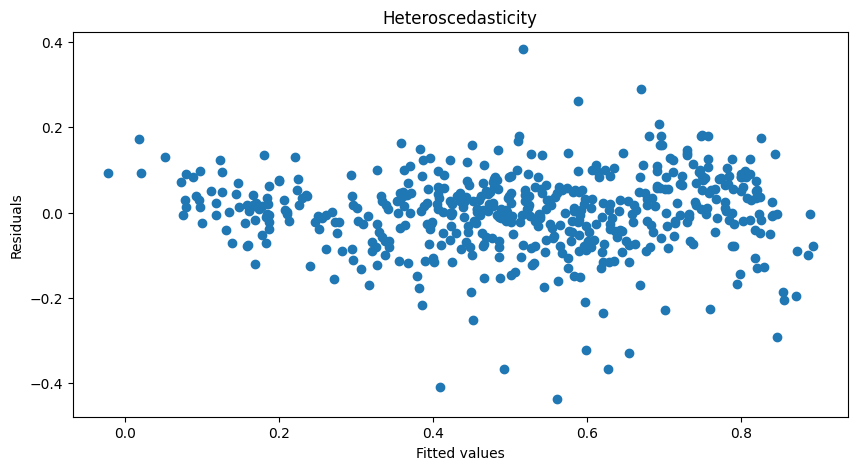

In [399]:
# check for Heteroscedasticity of the error terms
plt.figure(figsize=(10,5))
plt.title("Heteroscedasticity")
plt.scatter(y_train_pred, (y_train-y_train_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

**Observations:**

It is observed that residuals doesnot increase much w.r.t to predicted values which indicates that residuals have constant variance, Satisfying homoscedasticity of the error terms


# 8. Making Predictions on the test set

## 8.1 Rescaling the numerical variables of the test using min-max scaling

In [387]:
#num_scaler = MinMaxScaler()
#num_cols = ['temp','hum','windspeed','cnt']

boom_test[num_cols] = num_scaler.transform(boom_test[num_cols])

In [388]:
boom_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow + Rain,Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [389]:
boom_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow + Rain,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8.2 Separting target variables from the test set to create X_test and y_test datasets

In [390]:
y_test = boom_test.pop('cnt')
X_test = boom_test

## 8.3 Making predictions

In [391]:
# Removing the columns which are not used in the model building from the test set
X_train_n5.drop('const',axis=1, inplace = True)
X_test_n=X_test[X_train_n5.columns]

In [392]:
# Making predictions
X_test_n1 = sm.add_constant(X_test_n)
y_test_pred = MLRm6.predict(X_test_n1)

# 9. Evaluating the model

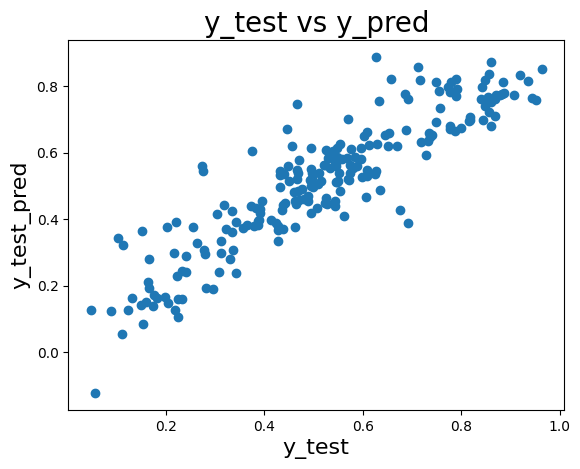

In [393]:
# comparing y_test and y_test_pred
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

# 9.1 Finding the r2 score of the test set

In [394]:
r2score_test = r2_score(y_test, y_test_pred)
r2score_test

0.8127685972413399

**R-squared value for the train set: <mark>0.827**

**R-squared value for the test set: <mark>0.812**

## 9.2 Finding the Adjusted r2 score of the test set

Adjusted R2=(1-R2)*(n-1)/(n-k-1)

where, n =sample size , k = number of independent variables

In [395]:
n = len(y_test)
k = X_test_n.shape[1]
adj_r2score_test = 1-((1-r2score_test)*(n-1)/(n-k-1))
adj_r2score_test

0.8037670874933274

**Adjusted R-squared value for the train set: <mark>0.823**

**Adjusted R-squared value for the test set: <mark>0.803**

## 9.3 Calculating the Mean Square Error of the train and test sets

In [396]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Square Error of the model with training set is ', mse_train)
print('Mean Square Error of the model with test set is ', mse_test)

Mean Square Error of the model with training set is  0.008725753630215535
Mean Square Error of the model with test set is  0.008892706785133755


Ml model has a mean square error value approximately equalu to zero for both train and tests, which indicates the model's accuracy in predicting the target varialbe.

# 10. Final Multi-linear-Regression model Equation

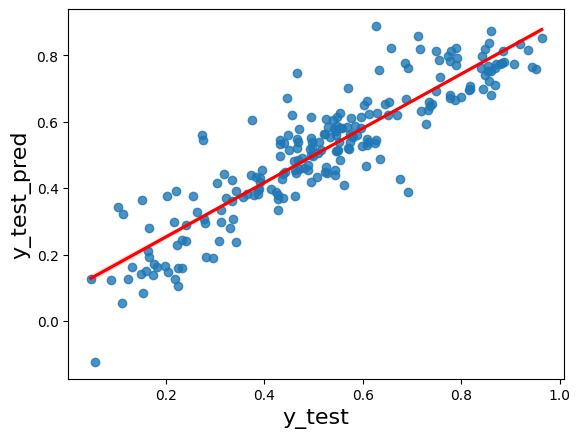

In [397]:
# plotting the regression to understand the model fit
sns.regplot(x=y_test, y=y_test_pred, ci=50, fit_reg=True, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

In [398]:
MLRm6.params

const                0.144614
yr                   0.233312
workingday           0.055438
temp                 0.470719
spring              -0.111605
winter               0.056603
July                -0.065787
Sep                  0.062275
Mon                  0.063954
Light Snow + Rain   -0.304382
Mist + Cloudy       -0.080935
dtype: float64

The equation of the best fitted line is giveny by:

$count = 0.144614 + 0.233312 \times year + 0.055438 \times workingday + 0.470719 \times temperature - 0.111605 \times spring + 0.056603 \times winter + -0.065787 \times july + 0.062275 \times september + 0.063954 \times Monday -0.304382 \times light snow/rain - 0.080935 \times mist/cloudy$

### **Inference:**  

The variance in the target varaible count can be explained majorly by


* Temperature (+0.470719)

* Year (+0.233312)

* Light snow + Rain (-0.304382)